# STEP-1 Business Problem Understanding

## Check whether a person is eligible for a loan or not.

# STEP-2 Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv("LoanData.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data["Loan_ID"].nunique()

614

In [6]:
data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
data["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [8]:
data["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
data["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [10]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [11]:
data["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [12]:
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [13]:
data["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
data["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [15]:
data["ApplicantIncome"].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [16]:
data["CoapplicantIncome"].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [17]:
data["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [18]:
data["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [19]:
data["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [20]:
data["Credit_History"].unique()

array([ 1.,  0., nan])

In [21]:
data["Credit_History"] = data["Credit_History"].replace({1:"good",0:"bad"})

In [22]:
data["Credit_History"].unique()

array(['good', 'bad', nan], dtype=object)

In [23]:
data["Credit_History"].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [24]:
data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [25]:
data["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [26]:
data["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [27]:
data["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

## Exploratory Data Analysis

In [28]:
continuous=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
discrete_categorical=["Gender","Married","Education","Self_Employed",
                      "Credit_History","Property_Area","Loan_Status"]
discrete_count=["Dependents","Loan_Amount_Term"]

### For Continuous Variables

In [29]:
data[continuous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


## Different Types of Plots

### 1.HistPlot

#### Based on the Histplot we can identify whether the data is normalized or skewed

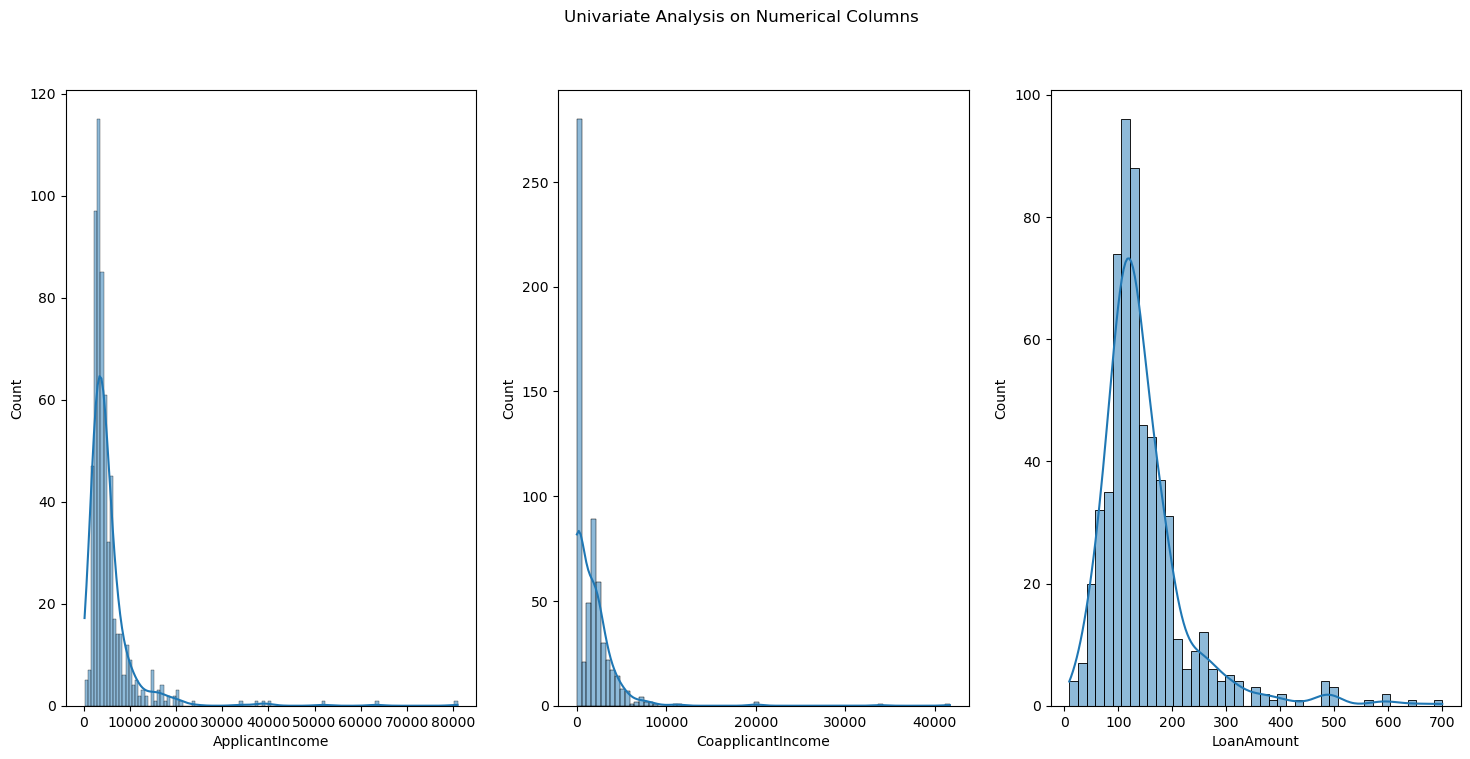

In [30]:
plt.rcParams["figure.figsize"]=(18,8)
plt.subplot(1,3,1)
sns.histplot(data["ApplicantIncome"],kde=True)
plt.subplot(1,3,2)
sns.histplot(data["CoapplicantIncome"],kde=True)
plt.subplot(1,3,3)
sns.histplot(data["LoanAmount"],kde=True)
plt.suptitle("Univariate Analysis on Numerical Columns")
plt.show()

### 2.Pairplot

#### Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

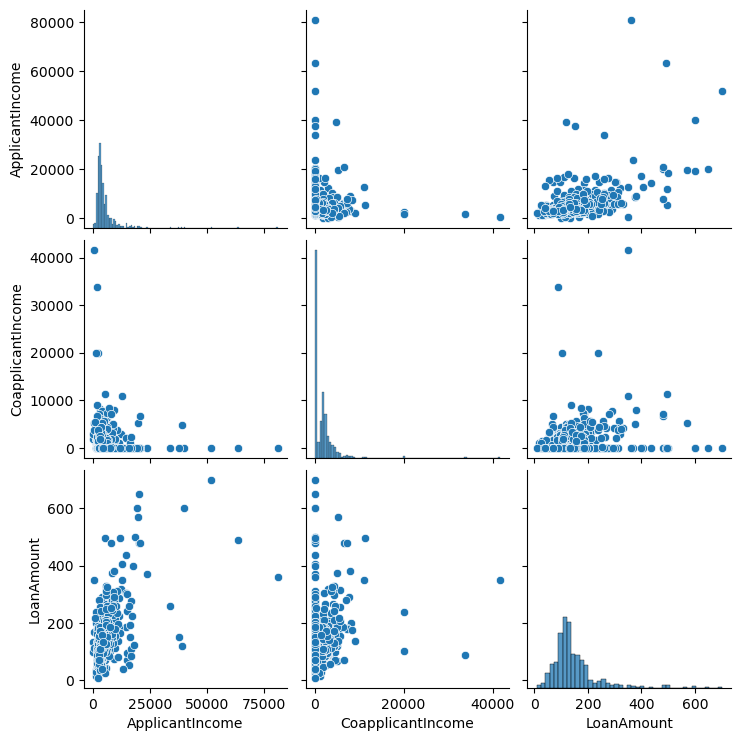

In [31]:
sns.pairplot(data[continuous])
plt.show()

### 3.Heatmap

#### Heatmaps are used to show relationships between two variables, one plotted on each axis

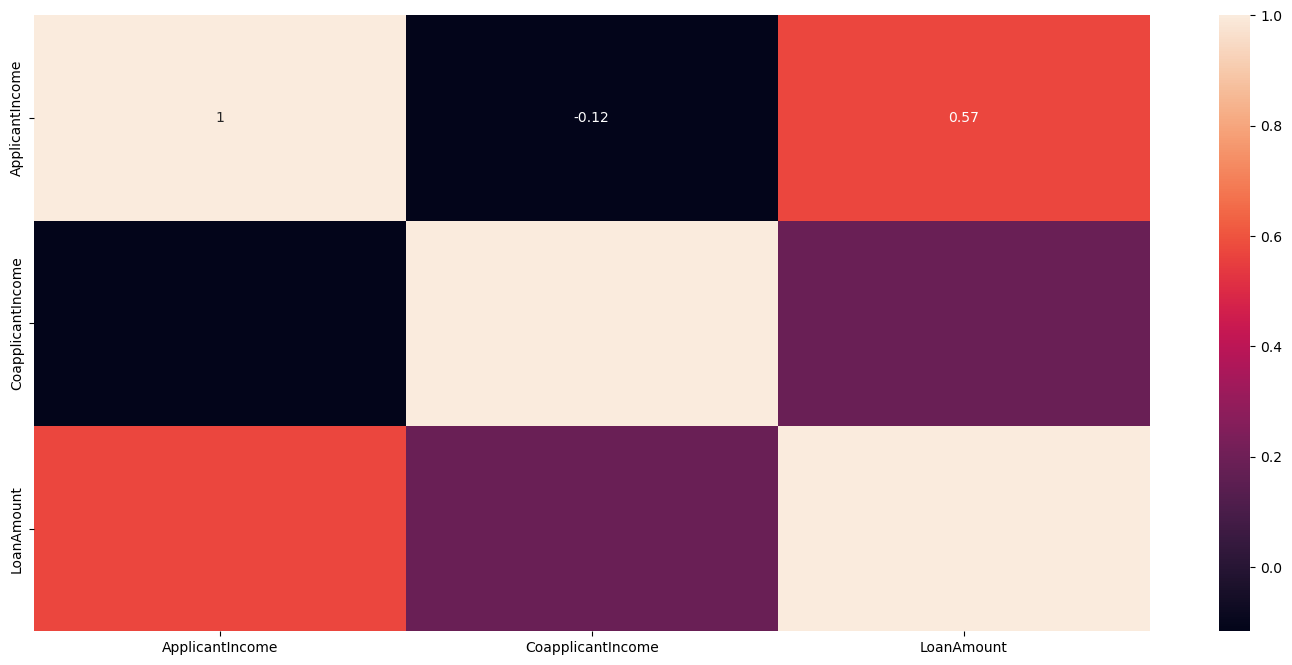

In [32]:
sns.heatmap(data[continuous].corr(),annot=True)
plt.show()

### For Discrete variables

In [33]:
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


## Steps to be followed for Data Cleaning

### Check for Wrong Data

In [34]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

#### The 'Dependents' column contains incorrect data, so it needs to be replaced with the correct values.

### Check for Wrong Data Format

In [35]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

### Check for Duplicates

In [36]:
data.duplicated().sum()

0

### Check for Missing Values

In [37]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
data.isnull().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Check for Outliers

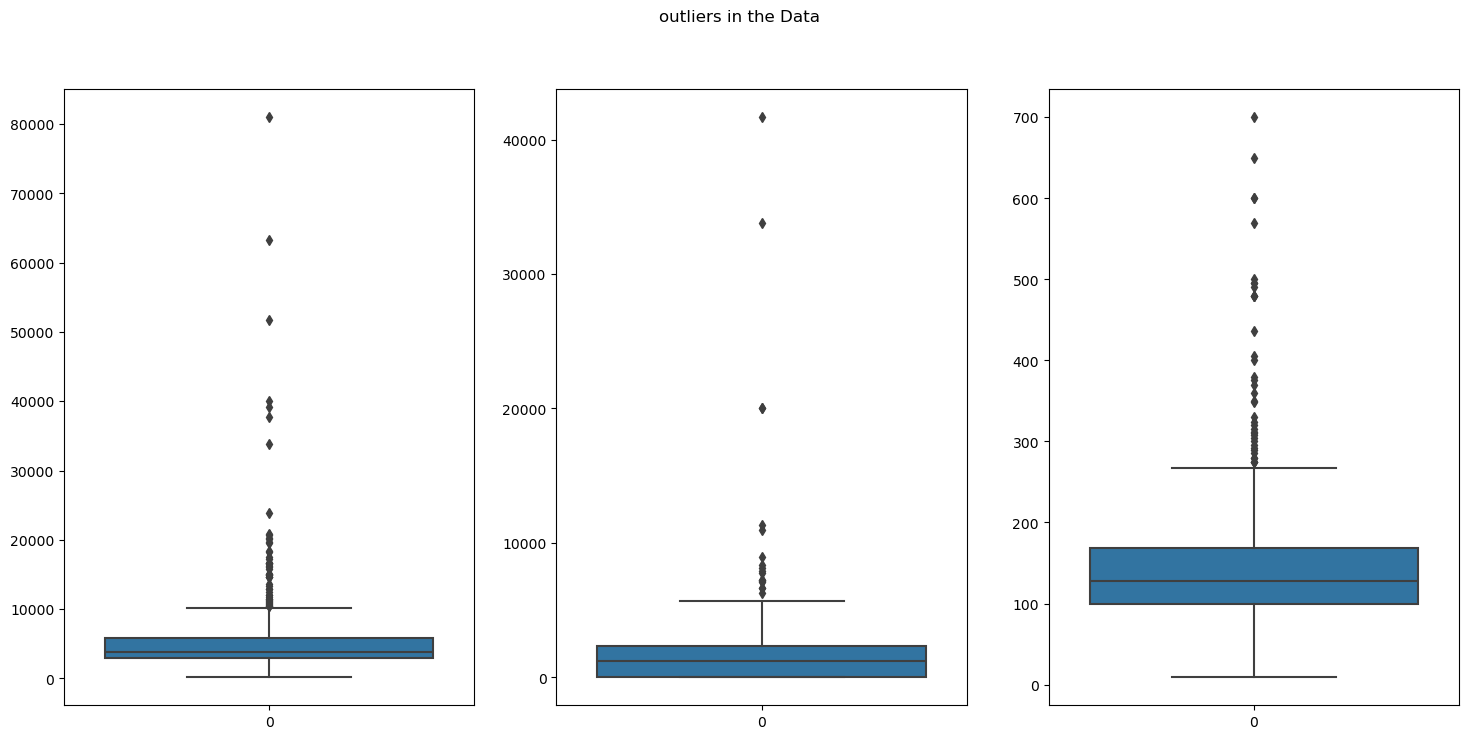

In [39]:
plt.subplot(1,3,1)
sns.boxplot(data["ApplicantIncome"])
plt.subplot(1,3,2)
sns.boxplot(data["CoapplicantIncome"])
plt.subplot(1,3,3)
sns.boxplot(data["LoanAmount"])
plt.suptitle("outliers in the Data")
plt.show()

### Check for Skewness

In [40]:
data[continuous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

# STEP-3 Data Preprocessing

## I.Data Cleaning

In [41]:
data["Income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]
data.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)

### Treating Wrong Data

In [42]:
data["Dependents"]=data["Dependents"].replace({"3+":3})

### No Treatment for duplicates

### Treating Missing Values

In [43]:
data.drop(columns=["Loan_ID"],inplace=True)
data["Dependents"] = data["Dependents"].fillna(0)
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"] = data["Married"].fillna(data["Married"].mode()[0])
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

data = data.dropna(subset=["Income","LoanAmount","Loan_Amount_Term","Credit_History"])

In [44]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

### Treating Wrong datatype

In [45]:
data["Dependents"] = data["Dependents"].astype("int")
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].astype("int")

### Treating Outliers

#### In this case, outliers should be retrained(if we change the values then we can't get the accurate results)

## II.Data Wrangling

### Feature Encoding

In [46]:
data["Gender"] = data["Gender"].replace({"Female":0,"Male":1})
data["Married"] = data["Married"].replace({"No":0,"Yes":1})
data["Education"] = data["Education"].replace({"Not Graduate":0,"Graduate":1})
data["Self_Employed"] = data["Self_Employed"].replace({"No":0,"Yes":1})
data["Property_Area"] = data["Property_Area"].replace({"Rural":0,"Semiurban":1,"Urban":2})
data["Credit_History"] = data["Credit_History"].replace({"good":0,"bad":1})
data["Loan_Status"] = data["Loan_Status"].replace({"N":0,"Y":1})

### Feature Transformations

In [47]:
from scipy.stats import boxcox
data["Income"],a = boxcox(data["Income"])
data["LoanAmount"],c = boxcox(data["LoanAmount"])

In [48]:
data["Income"].skew()

-0.02776906884678578

In [49]:
data["LoanAmount"].skew()

0.03828914734568106

## III.No Feature Scaling (Because all the values are in normalized format)

In [50]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,360,0,0,0,1.864967
2,1,1,0,1,1,5.202610,360,0,2,1,1.856556
3,1,1,0,0,0,6.138816,360,0,2,1,1.862802
4,1,0,0,1,0,6.401083,360,0,2,1,1.864819
5,1,1,2,1,1,7.481930,360,0,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,360,0,0,1,1.856069
610,1,1,3,1,0,4.460305,180,0,0,1,1.860675
611,1,1,1,1,0,7.388070,360,0,2,1,1.867771
612,1,1,2,1,0,6.870558,360,0,2,1,1.866991


### X&y

In [51]:
X = data.drop("Loan_Status",axis=1)
y = data["Loan_Status"]

### Identify the best random number

In [52]:
Train = []
Test = []
CV = []
for i in range(0,101):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    from sklearn.linear_model import LogisticRegression
    log_default = LogisticRegression()
    log_default.fit(X_train,y_train)

    ypred_train = log_default.predict(X_train)
    ypred_test = log_default.predict(X_test)
    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train, ypred_train))
    Test.append(accuracy_score(y_test, ypred_test))

    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(log_default, X_train, y_train, cv=5, scoring="accuracy").mean())

em = pd.DataFrame({"Train":Train, "Test":Test, "CV":CV})
gm = em[(abs(em["Train"]-em["Test"])<=0.05) & (abs(em["Test"]-em["CV"])<=0.05)]
rs = gm[gm["CV"]==gm["CV"].max()].index.to_list()[0]
print("best random_state number:",rs)

best random_state number: 70


## IV.train_test_split

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=70)

# STEP-4 ML Modelling

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### 1.Logistic Regression Algorithm

In [55]:
#Modelling
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

#Evaluation  
ypred_train = log_model.predict(X_train)
ypred_test  = log_model.predict(X_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score:",cross_val_score(log_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))
      

Train Accuracy : 0.8226950354609929
cross validation score: 0.8227731092436976
Test Accuracy : 0.7830188679245284


### 2.KNN Classifier Algorithm

In [56]:
#Hyper Parameter Tuning
estimator = KNeighborsClassifier()
param_grid = {"n_neighbors": list(range(1,50))}
knn_grid = GridSearchCV(estimator, param_grid,scoring="accuracy",cv=5)
knn_grid.fit(X_train,y_train)
knn_model = knn_grid.best_estimator_
knn_model

KNeighborsClassifier(n_neighbors=12)

In [57]:
#Modelling
knn_model = KNeighborsClassifier(n_neighbors=12)
knn_model.fit(X_train,y_train)

#Evaluation
ypred_train = knn_model.predict(X_train)
ypred_test  = knn_model.predict(X_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.7683215130023641
cross validation score : 0.7375630252100841
Test Accuracy : 0.7358490566037735


### 3.Support Vectors Machine Algorithm

In [58]:
#Hyper Parameter Tuning 
estimator = SVC()
param_grid = {"C":[0.01,0.1,1],"kernel":["linear","rbf","sigmoid","poly"]}
svm_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
svm_grid.fit(X_train,y_train)
svm_model = svm_grid.best_estimator_
svm_model

SVC(C=0.1, kernel='linear')

In [59]:
#Modelling
svm_model = SVC(C=0.1, kernel="linear")
svm_model.fit(X_train,y_train)

#Evaluation
ypred_train = svm_model.predict(X_train)
ypred_test  = svm_model.predict(X_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(svm_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8226950354609929
cross validation score : 0.8227731092436976
Test Accuracy : 0.7830188679245284


### 4.Decision Tree Classifier Algorithm

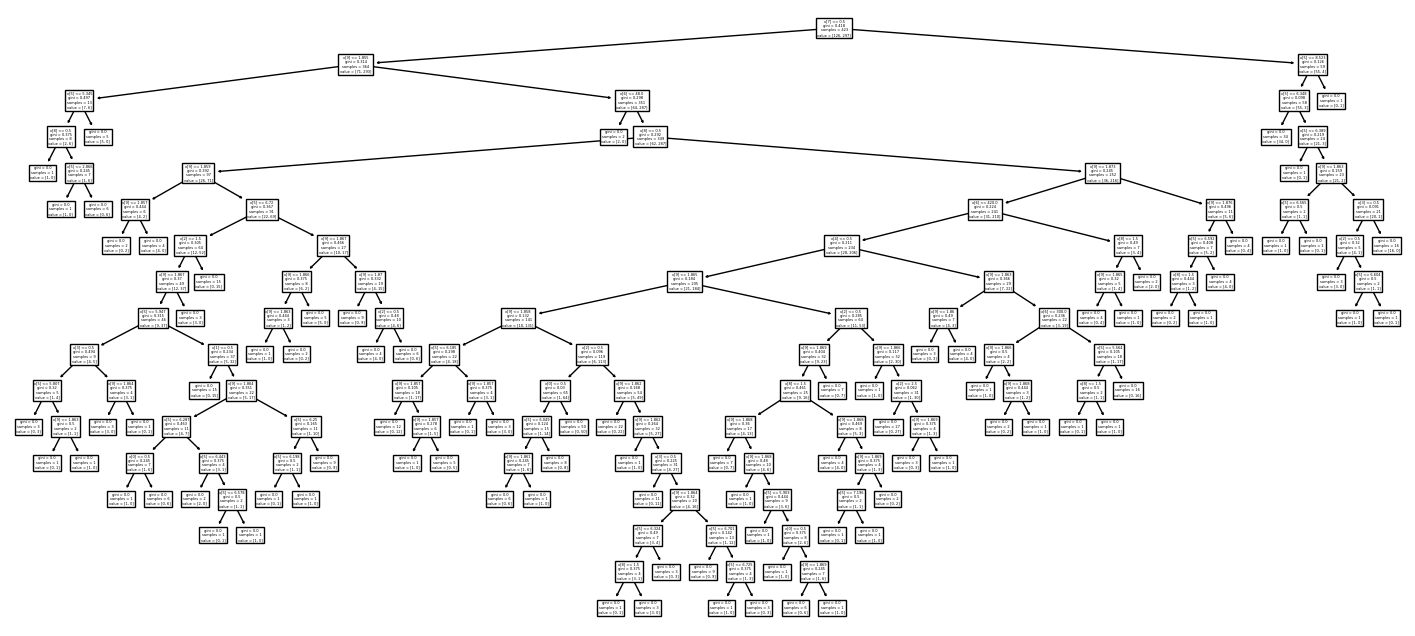

In [60]:
model = DecisionTreeClassifier(random_state=True)
model.fit(X_train,y_train)
from sklearn.tree import plot_tree
plot_tree(model)
plt.show()

In [61]:
#Hyper Parameter Tuning
estimator = DecisionTreeClassifier(random_state=True)
param_grid = {"criterion":["gini", "entropy"],
              "max_depth":list(range(1,16))}
dt_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
dt_grid.fit(X_train,y_train)
dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=1, random_state=True)

In [62]:
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [63]:
#Important features
feats_dt = pd.DataFrame(data=dt.feature_importances_,
                        index=X.columns,
                        columns=["Importance"])
important_features_dt = feats_dt[feats_dt["Importance"]>0].index.tolist()
important_features_dt

['Credit_History']

### Creating Decision Tree model with important parameters and important features

In [64]:
#Selecting train & test data
X_train_dt = X_train[important_features_dt]
X_test_dt = X_test[important_features_dt]

#Modelling
dt.fit(X_train_dt,y_train)

#Evaluation
ypred_train = dt.predict(X_train_dt)
ypred_test  = dt.predict(X_test_dt)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(dt,X_train_dt,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8226950354609929
cross validation score : 0.8227731092436976
Test Accuracy : 0.7830188679245284


### 5.Random Forest Classifier Algorithm

In [65]:
#Hyper Parameter Tuning
estimator = RandomForestClassifier(random_state=True)
param_grid = {"n_estimators":list(range(1,51))}
rf_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)
rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=45, random_state=True)

In [66]:
#Important features
feats_rf = pd.DataFrame(data=rf.feature_importances_,
                        index=X.columns,
                        columns=["Importance"])
important_features_rf = feats_rf[feats_rf["Importance"]>0].index.tolist()
important_features_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [67]:
#Selecting train & test data
X_train_rf = X_train[important_features_rf]
X_test_rf = X_test[important_features_rf]

#Modelling
rf.fit(X_train_rf,y_train)

#Evaluation
ypred_train = rf.predict(X_train_rf)
ypred_test  = rf.predict(X_test_rf)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(rf,X_train_rf,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9976359338061466
cross validation score : 0.8132773109243698
Test Accuracy : 0.7924528301886793


### 6.Ada Boost Classifier Algorithm

In [68]:
#Hyper Parameter Tuning
estimator = AdaBoostClassifier(random_state=True)
param_grid = {"n_estimators":list(range(1,51))}
ab_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(X_train,y_train)
ab = ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=3, random_state=True)

In [69]:
#Important features
feats_ab = pd.DataFrame(data=ab.feature_importances_,
                        index=X.columns,
                        columns=["Importance"])
important_features_ab = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_ab

['Credit_History', 'Property_Area', 'Income']

In [70]:
#Selecting train & test data
X_train_ab = X_train[important_features_ab]
X_test_ab = X_test[important_features_ab]

#Modelling
ab.fit(X_train_ab,y_train)

#Evaluation
ypred_train = ab.predict(X_train_ab)
ypred_test  = ab.predict(X_test_ab)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(ab,X_train_ab,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.83451536643026
cross validation score : 0.8298879551820729
Test Accuracy : 0.7641509433962265


### 7.Gradient Boosting Classifier Algorithm

In [71]:
#Hyper Parameter Tuning
estimator = GradientBoostingClassifier(random_state=True)
param_grid = {"n_estimators":list(range(1,10)),
              "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

gb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(X_train,y_train)

gb = gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.6, n_estimators=7, random_state=True)

In [72]:
#Important features
feats_gb = pd.DataFrame(data=gb.feature_importances_,
                        index=X.columns,
                        columns=["Importance"])
important_features_gb = feats_gb[feats_gb["Importance"]>0].index.tolist()
important_features_gb

['Gender',
 'Married',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [73]:
#Selecting train & test data
X_train_gb = X_train[important_features_gb]
X_test_gb = X_test[important_features_gb]

#Modelling
gb.fit(X_train_gb,y_train)

#Evaluation
ypred_train = gb.predict(X_train_gb)
ypred_test  = gb.predict(X_test_gb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(gb,X_train_gb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8747044917257684
cross validation score : 0.8228011204481793
Test Accuracy : 0.7358490566037735


### 8.XG Boost Classifier Algorithm

In [74]:
#Hyper Parameter Tuning
estimator = XGBClassifier()
param_grid = {"n_estimators":[10,20,40,100],
              "max_depth":[3,4,5],
              "gamma":[0,0.15,0.3,0.5,1]}

xgb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(X_train,y_train)

xgb = xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
#Important features
feats_xgb = pd.DataFrame(data=xgb.feature_importances_,
                        index=X.columns,
                        columns=["Importance"])
important_features_xgb = feats_gb[feats_xgb["Importance"]>0].index.tolist()
important_features_xgb

['Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [76]:
#Selecting train & test data
X_train_xgb = X_train[important_features_xgb]
X_test_xgb = X_test[important_features_xgb]

#Modelling
xgb.fit(X_train_xgb,y_train)

#Evaluation
ypred_train = xgb.predict(X_train_xgb)
ypred_test  = xgb.predict(X_test_xgb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8557919621749409
cross validation score : 0.8275070028011206
Test Accuracy : 0.7735849056603774


# STEP-5 Save the Best model

In [77]:
from joblib import dump

dump(log_model,"loan_status.joblib")

['loan_status.joblib']

# STEP-6 Predict on new data

In [78]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,360,0,0,0,1.864967
2,1,1,0,1,1,5.202610,360,0,2,1,1.856556
3,1,1,0,0,0,6.138816,360,0,2,1,1.862802
4,1,0,0,1,0,6.401083,360,0,2,1,1.864819
5,1,1,2,1,1,7.481930,360,0,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,360,0,0,1,1.856069
610,1,1,3,1,0,4.460305,180,0,0,1,1.860675
611,1,1,1,1,0,7.388070,360,0,2,1,1.867771
612,1,1,2,1,0,6.870558,360,0,2,1,1.866991


## Person-1:-

In [79]:
input_data ={"Loan_ID":"LP001099",
             "Gender":"Male",
             "Married":"Yes",
             "Dependents":0,
             "Education":"Graduate",
             "Self_Employed":"Yes",
             "LoanAmount":747,
             "Loan_Amount_Term":80,
             "Credit_History":1,
             "Property_Area":"Urban",
             "ApplicantIncome":350,
             "CoapplicantIncome":5000}
             

In [80]:
data = pd.DataFrame(input_data,index=[0])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome
0,LP001099,Male,Yes,0,Graduate,Yes,747,80,1,Urban,350,5000


### Apply Data Preprocessing on unknown data

In [81]:
data["Income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]
data.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)
data.drop(columns=["Loan_ID"],inplace=True)
data["Dependents"] = data["Dependents"].fillna(0)
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"] = data["Married"].fillna(data["Married"].mode()[0])
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])
data = data.dropna(subset=["Income","LoanAmount","Loan_Amount_Term","Credit_History"])
data["Dependents"] = data["Dependents"].astype("int")
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].astype("int")
data["Gender"] = data["Gender"].replace({"Female":0,"Male":1})
data["Married"] = data["Married"].replace({"No":0,"Yes":1})
data["Education"] = data["Education"].replace({"Not Graduate":0,"Graduate":1})
data["Self_Employed"] = data["Self_Employed"].replace({"No":0,"Yes":1})
data["Property_Area"] = data["Property_Area"].replace({"Rural":0,"Semiurban":1,"Urban":2})
data["Credit_History"] = data["Credit_History"].replace({"good":0,"bad":1})

X_new = data

In [82]:
X_new

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,1,1,0,1,1,747,80,1,2,5350


In [83]:
X_new = X_new[["Gender","Married","Dependents","Education","Self_Employed","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area","Income"]]
log_model.predict(X_new)

array([1], dtype=int64)

### The person will be eligible for a loan.

## Person-2:-

In [89]:
input_data ={"Loan_ID":"LP001099",
             "Gender":"Female",
             "Married":"Yes",
             "Dependents":2,
             "Education":"Not Graduate",
             "Self_Employed":"No",
             "LoanAmount":2000,
             "Loan_Amount_Term":80,
             "Credit_History":0,
             "Property_Area":"Urban",
             "ApplicantIncome":30,
             "CoapplicantIncome":50}

In [90]:
data = pd.DataFrame(input_data,index=[0])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome
0,LP001099,Female,Yes,2,Not Graduate,No,2000,80,0,Urban,30,50


### Apply Data Preprocessing on unknown data

In [91]:
data["Income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]
data.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)
data.drop(columns=["Loan_ID"],inplace=True)
data["Dependents"] = data["Dependents"].fillna(0)
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"] = data["Married"].fillna(data["Married"].mode()[0])
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])
data = data.dropna(subset=["Income","LoanAmount","Loan_Amount_Term","Credit_History"])
data["Dependents"] = data["Dependents"].astype("int")
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].astype("int")
data["Gender"] = data["Gender"].replace({"Female":0,"Male":1})
data["Married"] = data["Married"].replace({"No":0,"Yes":1})
data["Education"] = data["Education"].replace({"Not Graduate":0,"Graduate":1})
data["Self_Employed"] = data["Self_Employed"].replace({"No":0,"Yes":1})
data["Property_Area"] = data["Property_Area"].replace({"Rural":0,"Semiurban":1,"Urban":2})
data["Credit_History"] = data["Credit_History"].replace({"good":0,"bad":1})

X_new = data

In [92]:
X_new

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,0,1,2,0,0,2000,80,0,2,80


In [93]:
X_new = X_new[["Gender","Married","Dependents","Education","Self_Employed","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area","Income"]]
log_model.predict(X_new)

array([0], dtype=int64)

### The Person will not be eligible for a loan